In [1]:
import pandas as pd

# Assuming your data is in a CSV file
df = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
print(df.head())


   id    author geometry  pressure [MPa]  mass_flux [kg/m2-s]  x_e_out [-]  \
0   0  Thompson     tube            7.00               3770.0       0.1754   
1   1  Thompson     tube             NaN               6049.0      -0.0416   
2   2  Thompson      NaN           13.79               2034.0       0.0335   
3   3      Beus  annulus           13.79               3679.0      -0.0279   
4   4       NaN     tube           13.79                686.0          NaN   

   D_e [mm]  D_h [mm]  length [mm]  chf_exp [MW/m2]  
0       NaN      10.8        432.0              3.6  
1      10.3      10.3        762.0              6.2  
2       7.7       7.7        457.0              2.5  
3       5.6      15.2       2134.0              3.0  
4      11.1      11.1        457.0              2.8  


In [15]:
# Print the first 5 rows of the dataframe
print(df.head())

# Get the summary of the dataframe
print(df.info())

# Describe the statistical information of the dataframe
print(df.describe())


    id    author geometry  pressure [MPa]  mass_flux [kg/m2-s]  x_e_out [-]  \
3    3      Beus  annulus           13.79               3679.0      -0.0279   
9    9    Peskov     tube           12.00               1617.0       0.1228   
15  15  Thompson     tube           12.07               3255.0       0.0406   
17  17  Thompson     tube           10.41               2563.0       0.1092   
30  30   Janssen  annulus            9.68               5615.0       0.0196   

    D_e [mm]  D_h [mm]  length [mm]  chf_exp [MW/m2]  
3        5.6      15.2       2134.0              3.0  
9       10.0      10.0        520.0              2.2  
15       1.9       1.9        152.0              2.9  
17       4.6       4.6        229.0              6.8  
30      12.7      38.1        914.0              2.9  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6538 entries, 3 to 31635
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -----------

In [2]:
# Check for missing data
missing_data = df.isnull().sum()
print(missing_data)


id                         0
author                  5024
geometry                5500
pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64


In [10]:
#Drop Missing Values
df = df.dropna()


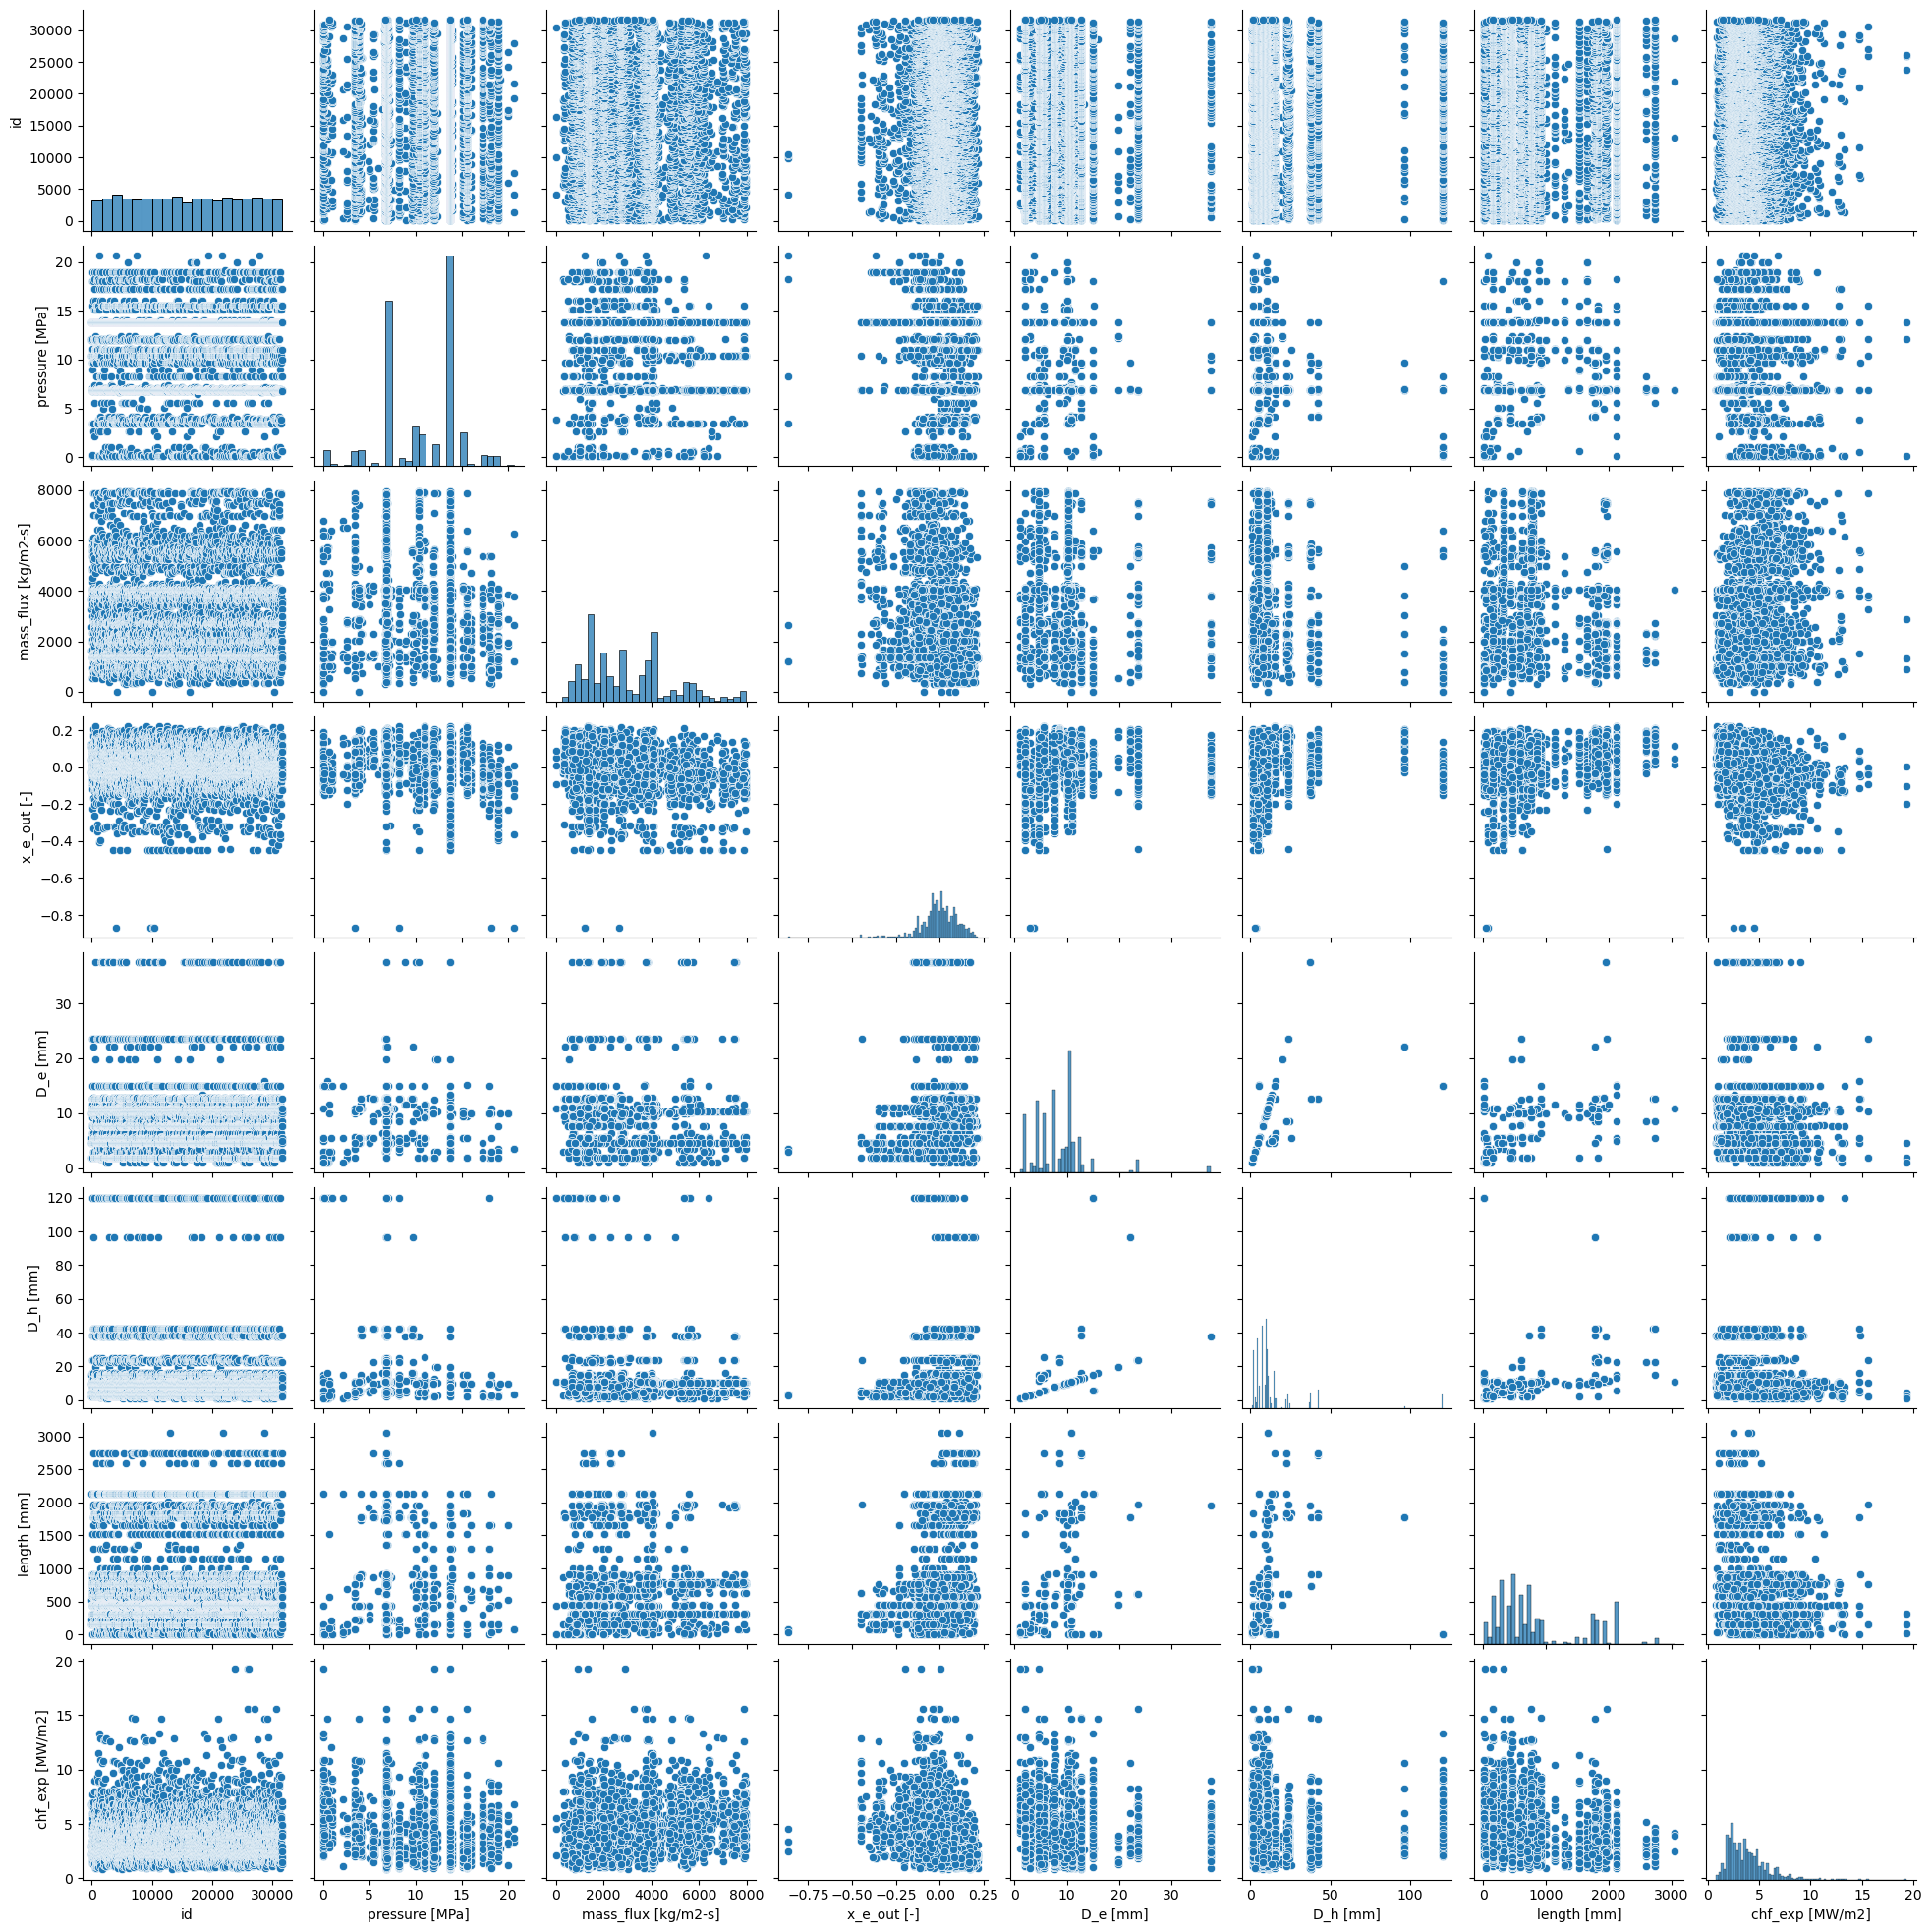

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


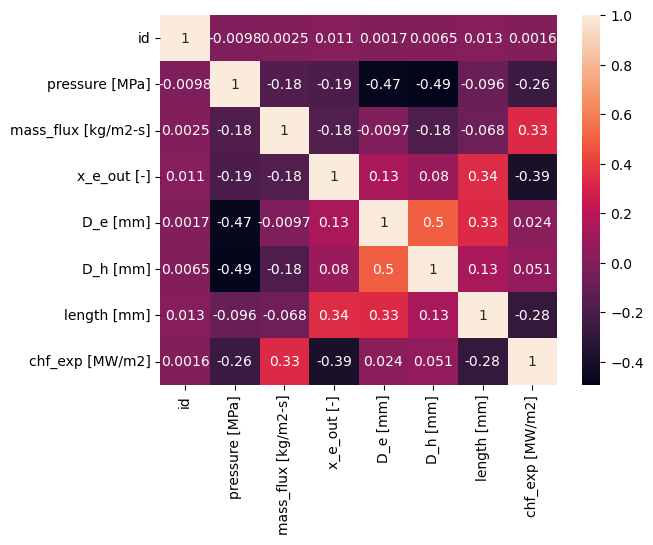

In [18]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [25]:
# Import necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data
data = pd.read_csv('data.csv')

# You'll need to replace 'target_column' with the name of the column that you're trying to predict
# And replace 'feature1', 'feature2', etc. with your actual feature names
features = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5']
target = 'target_column'

# Split data into X and y
X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select categorical columns
# This should be replaced with your actual categorical columns
categorical_cols = ['author', 'geometry']

# Apply one-hot encoder to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))

# One-hot encoding removed index; put it back
X_train_encoded.index = X_train.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
X_train_final = pd.concat([num_X_train, X_train_encoded], axis=1)

# Train the model
model = RandomForestRegressor()
model.fit(X_train_final, y_train)

# Prepare the test data
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))
X_test_encoded.index = X_test.index
num_X_test = X_test.drop(categorical_cols, axis=1)
X_test_final = pd.concat([num_X_test, X_test_encoded], axis=1)

# Make predictions
predictions = model.predict(X_test_final)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))

print('RMSE:', rmse)



KeyError: "None of [Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5'], dtype='object')] are in the [columns]"